In [1]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
    pretrained = True, pretrained_backbone = True).cuda()

In [2]:
# import torch
# precision = 'fp32' 
# model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd', model_math=precision).cuda()

In [3]:
import numpy as np
import torchvision.datasets as datasets
import cv2
from torch import device
import matplotlib.pyplot as plt
%matplotlib inline

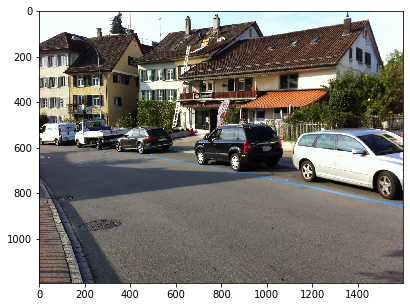

In [4]:
#img_path = datasets.ImageFolder('/Users/user/Downloads/')
img = cv2.imread('photo.jpg')[:,:,::-1]
fig = plt.figure(figsize = (10, 5))
plt.imshow(img);

In [5]:
model = model.eval().cuda()

In [6]:
# img = cv2.imread('/Users/user/Downloads/imgonline-com-ua-Resize-IoYJfs8151zBC2.jpg')[:,:,::-1]

In [7]:
img_tensor = torch.from_numpy(img.astype('float32')).permute(2,0,1) / 255.

In [8]:
predictions = model(img_tensor[None,:].cuda())
predictions

[{'boxes': tensor([[ 333.2113,  509.5066,  584.4078,  623.2811],
          [1102.1835,  513.4738, 1597.7899,  811.5964],
          [ 683.5919,  497.8907, 1070.4039,  700.1880],
          [   2.8623,  489.1823,  172.8882,  597.1218],
          [ 152.6261,  479.0545,  395.8398,  609.1489],
          [ 157.2498,  483.2990,  399.9189,  608.6978],
          [ 797.3439,  472.7533,  828.8156,  506.5919],
          [ 678.2492,  517.8099,  750.5500,  547.4764],
          [1291.6586,  518.0464, 1600.0000,  632.1229],
          [1148.4270,  512.2829, 1594.3923,  673.0322],
          [1235.3701,  511.2975, 1261.8101,  527.0099],
          [ 580.8714,  511.8717,  624.1167,  558.8785],
          [1546.0583,  526.1675, 1599.8822,  583.3174],
          [ 662.0674,  512.5707,  680.4852,  546.8073],
          [1231.7751,  545.0076, 1270.8147,  598.0182]], device='cuda:0',
         grad_fn=<StackBackward>),
  'labels': tensor([ 3,  3,  3,  8,  8,  3,  1,  3,  3,  3,  1,  3,  3, 11,  1],
         device='

In [9]:
# def plot_preds (numpy_img, predictions):
#     boxes = predictions['boxes']
#     boxes = boxes.cpu().detach().numpy()
#     for box in boxes:
#         numpy_img = cv2.rectangle(cv2.UMat(numpy_img), (box[0], box[1],
#                                               box[2], box[3]), 255, 2)
#         numpy_img = cv2.rectangle(numpy_img, (box[0], box[1]), (box[2], box[3]), 255, 3)
#     return numpy_img.get()

In [10]:
# predictions['boxes'][predictions['labels'] == LABEL]\
#     [predictions['scores'][predictions['labels'] == LABEL] > CONF_THRESH]

#predictions['boxes'] > CONF_THRESH

 ```python
 boxes = predictions['boxes'][[predictions['labels'] == LABEL]and[predictions['scores'] > CONF_THRESH]] # выбирает не те боксы, выбиирает и с правильным боксом и с нужным скором, хотя должен выбирать нужные боксы с нужным скором
 ```
 + 
 ссылка на описание лейблов: [тут](https://github.com/amikelive/coco-labels/blob/master/coco-labels-paper.txt)  
 лейблы с датасета coco, т.к. модель предобучена на этом датасете

In [11]:
# CONF_THRESH = 0.7
# LABEL = 3
# predictions = predictions[0]
# # boxes = predictions['boxes'][[predictions['labels'] == LABEL]and[predictions['scores'] > CONF_THRESH]] # выирает не те боксы, выбиирает и с правильным боксом и
# #                             # с нужным скором, хотя должен выбирать нужные боксы с нужным скором
# boxes = predictions['boxes'][predictions['labels'] == LABEL]\
#             [predictions['scores'][predictions['labels'] == LABEL] > CONF_THRESH]
# boxes_dict = {}
# boxes_dict['boxes'] = boxes

In [12]:

def plot_preds(numpy_img, predictions, CONF_TRESH):
  boxes = predictions['boxes'][predictions['labels'] == 3]\
    [predictions['scores'][predictions['labels'] == 3] > CONF_TRESH]
  boxes = boxes.cpu().detach().numpy()
  for box in boxes:
    numpy_img = cv2.rectangle(numpy_img.astype(np.float32), (box[0], box[1]), (box[2], box[3]), 255, 3)
  return numpy_img

In [13]:
# boxes_dict

<ipython-input-12-09b706b29765>:6: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  numpy_img = cv2.rectangle(numpy_img.astype(np.float32), (box[0], box[1]), (box[2], box[3]), 255, 3)


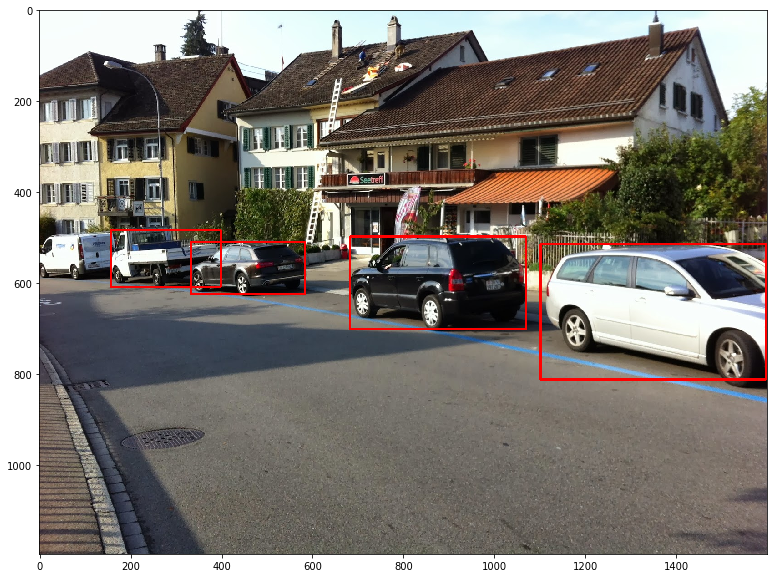

In [23]:
boxes_img = plot_preds(img, predictions[0], CONF_TRESH = 0.5)
plt.figure(figsize = (20,10))
plt.imshow(boxes_img.astype('uint'));

<ipython-input-12-09b706b29765>:6: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  numpy_img = cv2.rectangle(numpy_img.astype(np.float32), (box[0], box[1]), (box[2], box[3]), 255, 3)


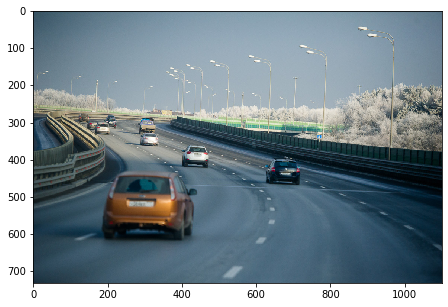

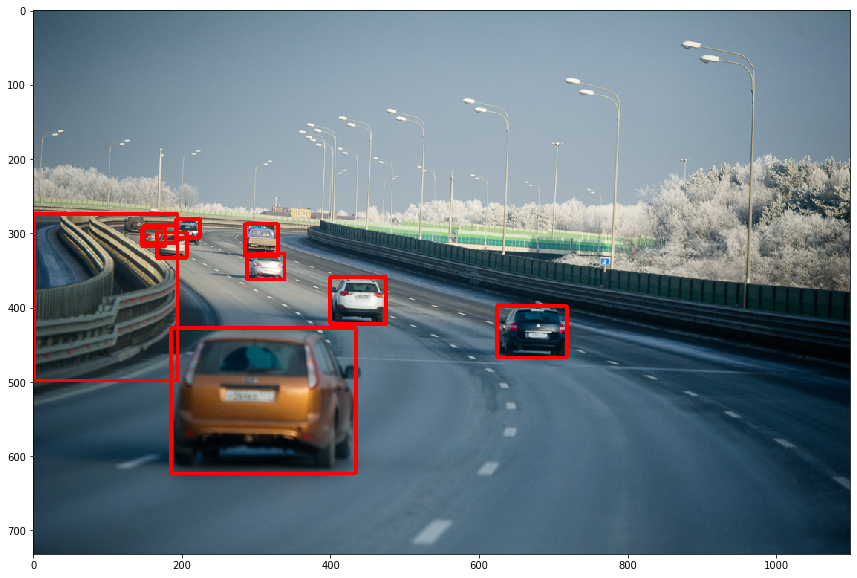

In [25]:
img2 = cv2.imread('00s.jpg')[:,:,::-1]
fig2 = plt.figure(figsize = (10, 5))
plt.imshow(img2);
img2_tensor = torch.from_numpy(img2.astype('float32')).permute(2,0,1) / 255.
predictions2 = model(img2_tensor[None,:].cuda())
# predictions
boxes_img2 = plot_preds(img2, predictions2[0], CONF_TRESH = 0.6)
plt.figure(figsize = (20,10))
plt.imshow(boxes_img2.astype('uint'));

#### Увеличвая трэш_конф убираем и не нужные объекты и объекты правильные, но с меньшим скором

<ipython-input-12-09b706b29765>:6: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  numpy_img = cv2.rectangle(numpy_img.astype(np.float32), (box[0], box[1]), (box[2], box[3]), 255, 3)


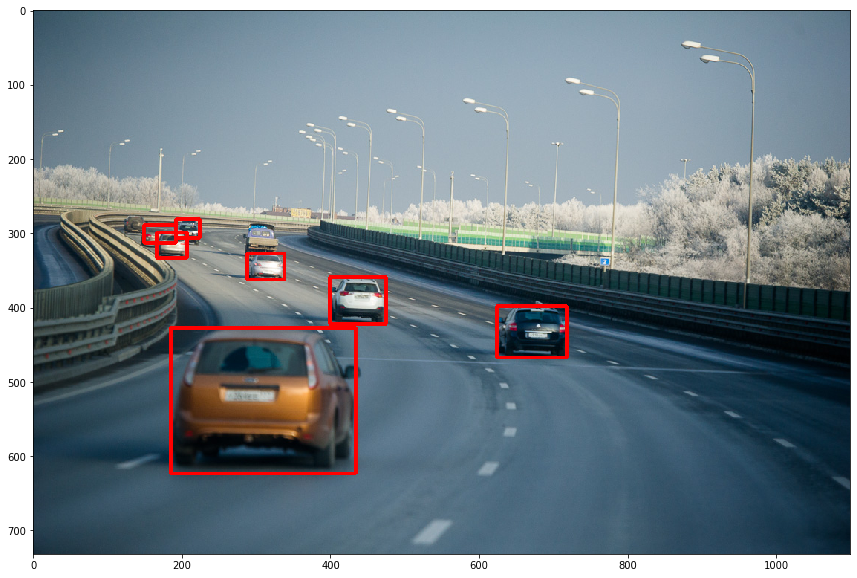

In [26]:
boxes_img2 = plot_preds(img2, predictions2[0], CONF_TRESH = 0.7)
plt.figure(figsize = (20,10))
plt.imshow(boxes_img2.astype('uint'));

А тут уже ничего не понимает.  
Почему?  
Скорее всего картинок авто сверху в датасете коко не было.  
Чтобы сеть что-то нарисовала, пришлось скор опустить до 0.01, что означает, что это не предсказания а случайный мусор.

<ipython-input-12-09b706b29765>:6: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  numpy_img = cv2.rectangle(numpy_img.astype(np.float32), (box[0], box[1]), (box[2], box[3]), 255, 3)


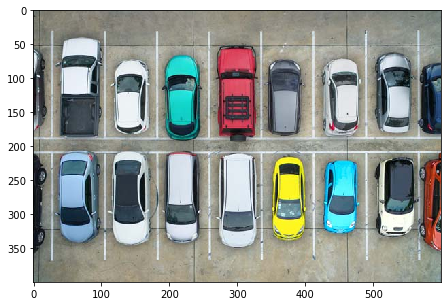

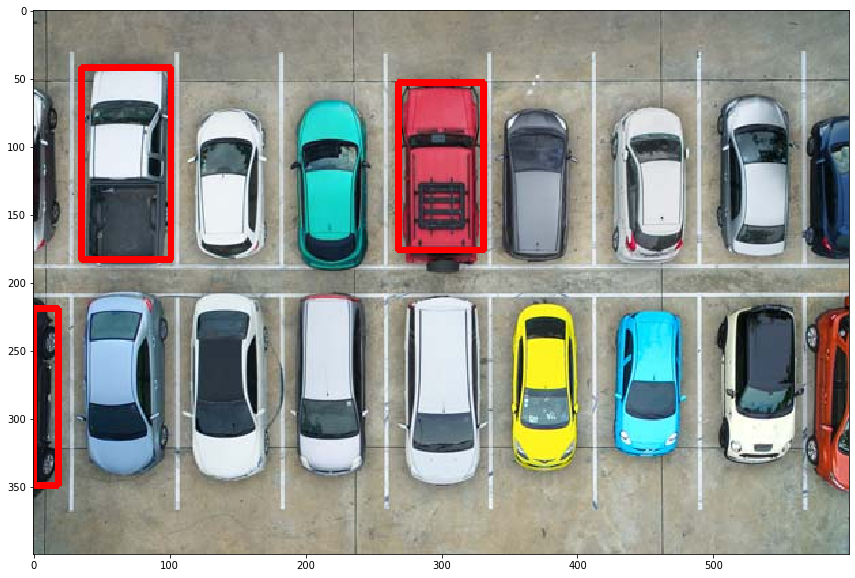

In [30]:
img3 = cv2.imread('1502173753105.jpg')[:,:,::-1]
fig3 = plt.figure(figsize = (10, 5))
plt.imshow(img3);
img3_tensor = torch.from_numpy(img3.astype('float32')).permute(2,0,1) / 255.
predictions3 = model(img3_tensor[None,:].cuda())
# predictions
boxes_img3 = plot_preds(img3, predictions3[0], CONF_TRESH = 0.01)
plt.figure(figsize = (20,10))
plt.imshow(boxes_img3.astype('uint'));

#### Зато такие изображения, сеть детектирует достаточно хорошо:  
(даже кусок бампера распознал)

<ipython-input-12-09b706b29765>:6: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  numpy_img = cv2.rectangle(numpy_img.astype(np.float32), (box[0], box[1]), (box[2], box[3]), 255, 3)


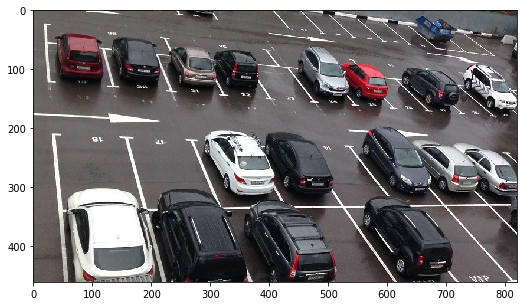

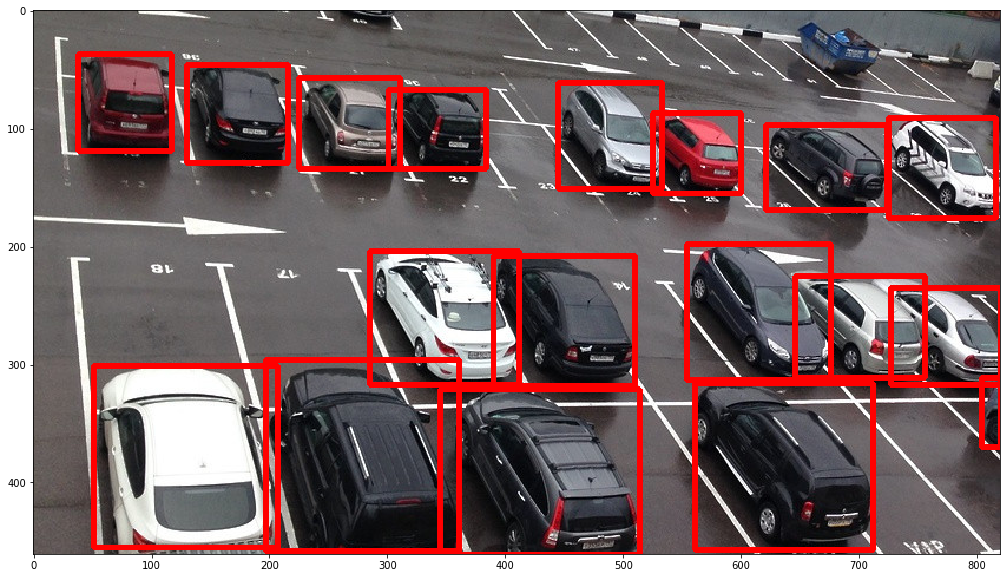

In [39]:
img4 = cv2.imread('o0OtcERZCO0u5VffZ3jM6fkPXRSOW2Ilb36MsCZauI6hugOtUOOQc2aMwuB0dhctV9R9nxCUcBZdjtgLE15Ni3sFi82X76p7.jpg')[:,:,::-1]
fig4 = plt.figure(figsize = (10, 5))
plt.imshow(img4);
img4_tensor = torch.from_numpy(img4.astype('float32')).permute(2,0,1) / 255.
predictions4 = model(img4_tensor[None,:].cuda())
# predictions
boxes_img4 = plot_preds(img4, predictions4[0], CONF_TRESH = 0.5)
plt.figure(figsize = (20,10))
plt.imshow(boxes_img4.astype('uint'));